## Homework 1 - Data Exploration using Census Data

In this homework assignment you will use census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. We will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. You are expected to read the documentation of this dataset, understand the features and preprocess this dataset. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

Below you will find a code snippet to read the data into a pandas dataframe. You can alternatively download it yourself, extract and read it manually. The questions are shown in the subsequent cells. You need to provide your answers in this file. 

Your code is expected to have no errors, please make sure all your cells run properly before submitting (click Kernel->Restart & Run All to see if your code sequence works). 

__Please change the notebook's name and add your name before submitting.__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# import urllib.request
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz'
# census_dl_file = './census-income.data.gz'
# urllib.request.urlretrieve(url, census_dl_file)

In [3]:
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [4]:
# used to change feature names for ease of understanding -- abbr are really confusing
real_ft = ['age','class of worker','industry code','occupation code','education','wage per hour',
           'enrolled in edu inst last wk','marital status','major industry code','major occupation code',
           'race','hispanic Origin','sex','member of a labor union','reason for unemployment',
           'full or part time employment stat','capital gains','capital losses','dividends from stocks',
           'tax filer status','region of previous residence','state of previous residence',
           'detailed household and family stat','detailed household summary in household',
           'instance weight','migration code-change in msa','migration code-change in reg',
           'migration code-move within reg','live in this house 1 year ago','migration prev res in sunbelt',
           'num persons worked for employer','family members under 18','country of birth father',
           'country of birth mother','country of birth self','citizenship','own business or self employed',
           'fill inc questionnaire for veteran admin','veterans benefits','weeks worked in year','year',
           'total person income']

In [5]:
# you can read from the compressed file
df = pd.read_csv('census-income.data.gz', compression='gzip', names=real_ft, sep=r',', skipinitialspace=True)
df.head()

# you can also unzip census-income.zip and read using the following
# df = pd.read_csv('census-income.csv', names=columns_abbr, sep=r',', skipinitialspace=True)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran admin,veterans benefits,weeks worked in year,year,total person income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [6]:
# you can see the DataFrame's info panel here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   age                                       199523 non-null  int64  
 1   class of worker                           199523 non-null  object 
 2   industry code                             199523 non-null  int64  
 3   occupation code                           199523 non-null  int64  
 4   education                                 199523 non-null  object 
 5   wage per hour                             199523 non-null  int64  
 6   enrolled in edu inst last wk              199523 non-null  object 
 7   marital status                            199523 non-null  object 
 8   major industry code                       199523 non-null  object 
 9   major occupation code                     199523 non-null  object 
 10  race                

### Q1 - Basic Dataset Manipulation [15 pts]

#### Q1.1 Sort the instances in the dataset based on their age in descending order (AAGE attribute in the Census dataset corresponds to the age) and display top-20 instances. (5 pts)






In [7]:
srtd_age = df.sort_values(by=['age'], ascending=False)
srtd_age.head(20)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran admin,veterans benefits,weeks worked in year,year,total person income
46356,90,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Italy,Italy,United-States,Native- Born in the United States,0,No,1,0,95,- 50000.
96646,90,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Ecuador,Ecuador,Ecuador,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
80878,90,Not in universe,0,0,7th and 8th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Italy,Italy,Italy,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,94,- 50000.
126478,90,Not in universe,0,0,10th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
149712,90,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
75243,90,Not in universe,0,0,7th and 8th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Italy,Italy,Italy,Foreign born- U S citizen by naturalization,0,Not in universe,2,0,94,- 50000.
124107,90,Not in universe,0,0,Some college but no degree,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
143932,90,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
3360,90,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
34993,90,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


#### Q1.2 Discover the average age for top 7% oldest instances? Display two decimal places for the average age. (5 pts)


In [8]:
# Number of top rows equivalent to 7% percent of the data 
num = 199523*0.07
num

13966.61

In [9]:
# Average Age of top 7%
topAge = srtd_age.nlargest(13967, ['age'])
print("Average Age of top 7% = {:.2f}".format(topAge['age'].mean()))

Average Age of top 7% = 78.70


#### Q1.3 Find and display the median age of instances for each reported race (available in ARACE feature). [Hint: You can use groupby() function.] (5 pts)


In [10]:
df1 = df.groupby(['race'])
df1['age'].median()

race
Amer Indian Aleut or Eskimo    25.0
Asian or Pacific Islander      30.0
Black                          28.0
Other                          23.0
White                          34.0
Name: age, dtype: float64

### Q2 - Identify the data scales and data types for each variable in census data. Identify the domain for each variable by checking the attributes' values. Then, create a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables. [60 pts]


#### Q2.1 Identifying the characteristics (20 pts)
For data scales, identify whether an attribute is nominal, ordinal, interval, or ratio scale.
For data types, identify the domain and provide an appropriate data type (integer, float, String, date, Boolean). See if that data type is correct in your dataframe.
For domain, inspect each distinct value for each attribute. Identify missing values. 

You can create an external csv file consisting five [or more] columns (including feature name, description, scale, data type, and domain) and display it. A template is provided (See ___features.csv___). To understand what these features represent, please check the original documentation.

Please include this file in your submission to get points.

In [11]:
# inspecting distinct values of each column
df.apply(lambda col: col.unique())

age                                         [73, 58, 18, 9, 10, 48, 42, 28, 47, 34, 8, 32,...
class of worker                             [Not in universe, Self-employed-not incorporat...
industry code                               [0, 4, 40, 34, 43, 37, 24, 39, 12, 35, 45, 3, ...
occupation code                             [0, 34, 10, 3, 40, 26, 37, 31, 12, 36, 41, 22,...
education                                   [High school graduate, Some college but no deg...
wage per hour                               [0, 1200, 876, 500, 400, 450, 650, 475, 1100, ...
enrolled in edu inst last wk                [Not in universe, High school, College or univ...
marital status                              [Widowed, Divorced, Never married, Married-civ...
major industry code                         [Not in universe or children, Construction, En...
major occupation code                       [Not in universe, Precision production craft &...
race                                        [White, Asian or

In [12]:
# masking the '?' value in the columns and changing them to NaN
updated_df1 = df.mask(df == '?',np.nan)
df3 = updated_df1.copy()

In [13]:
# the following columns have the following amount of missing values:
# AREORGN - hispanic Origin                               874 
# GRINST - state of previous residence                    708 
# MIGMTR1 - migration code-change in msa                99696
# MIGMTR3 - migration code-change in reg                99696
# MIGMTR4 - migration code-move within reg              99696
# MIGSUN - migration prev res in sunbelt                99696
# PEFNTVTY - country of birth father                     6713
# PEMNTVTY - country of birth mother                     6119
# PENATVTY - country of birth self                       3393
# the rest of the columns do no have any missing values
updated_df1.isnull().sum()

age                                             0
class of worker                                 0
industry code                                   0
occupation code                                 0
education                                       0
wage per hour                                   0
enrolled in edu inst last wk                    0
marital status                                  0
major industry code                             0
major occupation code                           0
race                                            0
hispanic Origin                               874
sex                                             0
member of a labor union                         0
reason for unemployment                         0
full or part time employment stat               0
capital gains                                   0
capital losses                                  0
dividends from stocks                           0
tax filer status                                0


In [14]:
for (name, series) in updated_df1.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)))
    print('\tNumber of unique values', series.unique().size)# gives an idea about domain (possible elements) and cardinality

ANALYZING THE COLUMN: age
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 91
ANALYZING THE COLUMN: class of worker
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 9
ANALYZING THE COLUMN: industry code
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 52
ANALYZING THE COLUMN: occupation code
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 47
ANALYZING THE COLUMN: education
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 17
ANALYZING THE COLUMN: wage per hour
	Total number of records 199523
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 1240
ANALYZING THE COLUMN: enrolled in edu inst last wk
	Tot

In [15]:
# handeling missing values
# drop na in categorical features 
drop_col_vals = ['hispanic Origin','migration code-change in msa', 'migration code-change in reg', 
             'migration code-move within reg', 'migration prev res in sunbelt', 'country of birth father', 
             'country of birth mother', 'country of birth self']
updated_df1 = updated_df1.dropna(subset= drop_col_vals)

In [17]:
# please fill the information for the data characteristics in the given csv file. read it here and display.
# N, O, I, R are Nominal, Ordinal, Interval, Ratio
features_df = pd.read_csv('./features.csv', index_col ='col_name')
features_df

,desc,data_type,"scale (N, O, I, R)",domain,missing_values
col_name,,,,,
AAGE,age,Int64,R,"73, 58, 18, 9, ?",0
ACLSWKR,class of worker,string,N,"Not in universe, Federal government, Local gov...",0
ADTIND,industry code,Int64,N,"0, 40, 44, 2, 43, 47, ?",0
ADTOCC,occupation code,Int64,N,"0, 12, 31, 44, 19, 32, ?",0
AHGA,education,string,O,"Children, 7th and 8th grade, 9th grade, 10th g...",0
AHRSPAY,wage per hour,Int64,R,"0, 1200, 876, ?",0
AHSCOL,enrolled in edu inst last wk,string,N,"Not in universe, High school, College or unive...",0
AMARITL,marital status,string,N,"Never married, Married-civilian spouse present...",0
AMJIND,major industry code,string,N,"Not in universe or children, Entertainment, So...",0


In [18]:
# get the list of names of features (used to change feature names for ease of understanding)
feature_names= features_df['desc']
real_ft = []
for row in features_df['desc']:
    real_ft.append(row)

#### Q2.2 Create a Data Quality Report (40 pts)

Include the bar plots and histograms for visualizing the distributions. You may get your descriptions from features.csv file. 

The examples for a continuous and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. If you will read from a csv, make sure you have that csv in your submission zip file.


### Example Data Quality Report for Continuous Variables
| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AAGE | Age | 199,523 | 0 | 91 | 0 | 15 | 33 | 50 | 90 | 34.49 | 22.31 |  |

### Example Data Quality Report for Categorical Variables
| Feature | Desc. | Count | % of Missing | Card. | Mode | Mode Freq. | Mode % | 2nd Mode | 2nd Mode Freq. | 2nd Mode Perc | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACLSWKR | Class of worker | 199,523 | 0 | 9 | Not in Universe | 100,245 | 50.24 | Private | 72,028 |  36.10 |  |

In [19]:
# Data Quality Report for Continuous Variables
con_ft = ['age', 'wage per hour','capital gains', 'capital losses', 'dividends from stocks', 'instance weight', 
           'num persons worked for employer', 'weeks worked in year']

con_header = ['Count', '% Miss', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.']

con_df = pd.DataFrame(index=con_ft, columns=con_header)
con_df.index.name = 'Feature_Name'
columns = df[con_ft]

con_df[con_header[0]] = columns.count()

missing = columns.isna()
con_df[con_header[1]] = missing.sum() / len(columns)

con_df[con_header[2]] = columns.nunique()

con_df[con_header[3]] = columns.min()

con_df[con_header[4]] = columns.quantile(0.25)

con_df[con_header[5]] = round(columns.mean(), 1)

con_df[con_header[6]] = columns.median()

con_df[con_header[8]] = columns.max()

con_df[con_header[7]] = columns.quantile(0.75)

con_df[con_header[9]] = round(columns.std(), 1)

con_df

,Count,% Miss,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
Feature_Name,,,,,,,,,,
age,199523,0.0,91,0.00,15.000,34.5,33.00,50.00,90.0,22.3
wage per hour,199523,0.0,1240,0.00,0.000,55.4,0.00,0.00,9999.0,274.9
capital gains,199523,0.0,132,0.00,0.000,434.7,0.00,0.00,99999.0,4697.5
capital losses,199523,0.0,113,0.00,0.000,37.3,0.00,0.00,4608.0,271.9
dividends from stocks,199523,0.0,1478,0.00,0.000,197.5,0.00,0.00,99999.0,1984.2
instance weight,199523,0.0,99800,37.87,1061.615,1740.4,1618.31,2188.61,18656.3,993.8
num persons worked for employer,199523,0.0,7,0.00,0.000,2.0,1.00,4.00,6.0,2.4
weeks worked in year,199523,0.0,53,0.00,0.000,23.2,8.00,52.00,52.0,24.4


C:\Users\hanin\AppData\Local\Temp/ipykernel_6136/2464027841.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  continuous.hist(bins=5, alpha=0.5, ax=ax)


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'wage per hour'}>,
        <AxesSubplot:title={'center':'capital gains'}>],
       [<AxesSubplot:title={'center':'capital losses'}>,
        <AxesSubplot:title={'center':'dividends from stocks'}>,
        <AxesSubplot:title={'center':'instance weight'}>],
       [<AxesSubplot:title={'center':'num persons worked for employer'}>,
        <AxesSubplot:title={'center':'weeks worked in year'}>,
        <AxesSubplot:>]], dtype=object)

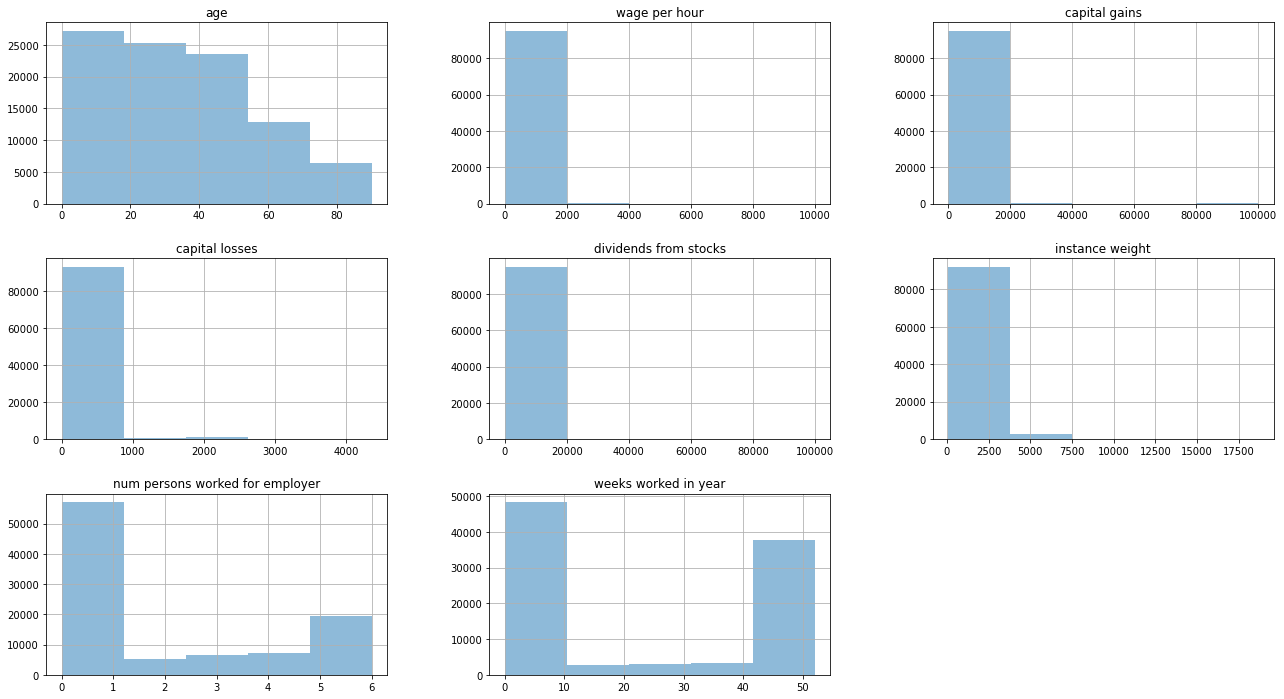

In [21]:
# histograms for continuous variables
con_ft = ['age', 'wage per hour','capital gains', 'capital losses', 'dividends from stocks', 'instance weight', 
           'num persons worked for employer', 'weeks worked in year']
continuous = updated_df1.get(con_ft)

fig, ax = plt.subplots(figsize=(22,12)) # get a larger figure
continuous.hist(bins=5, alpha=0.5, ax=ax)

In [22]:
# Data Quality Report for Categorical Variables
cat_ft = ['class of worker','industry code','occupation code','education','enrolled in edu inst last wk','marital status',
          'major industry code','major occupation code','race','hispanic Origin','sex','member of a labor union',
          'reason for unemployment','full or part time employment stat','tax filer status','region of previous residence',
          'state of previous residence','detailed household and family stat','detailed household summary in household',
          'migration code-change in msa','migration code-change in reg','migration code-move within reg',
          'live in this house 1 year ago','migration prev res in sunbelt','family members under 18',
          'country of birth father','country of birth mother','country of birth self','citizenship'
          ,'fill inc questionnaire for veteran admin']

cat_header = ['Count', '% Miss', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']

cat_df = pd.DataFrame(index=cat_ft, columns=cat_header)
cat_df.index.name = 'Feature_Name'
columns = df3[cat_ft]

count = columns.count()
cat_df[cat_header[0]] = columns.count()

missing = columns.isna()
cat_df[cat_header[1]] = round((missing.sum() / len(columns)) * 100, 1)

cat_df[cat_header[2]] = columns.nunique()

amount = len(cat_ft)
mode_f = [''] * amount
modes = [''] * amount
modes_2 = [''] * amount
mode_p = [''] * amount
mode_f2 = [''] * amount
mode_p2 = [''] * amount
    
for col in columns:
    values = columns[col].value_counts()
    index = cat_ft.index(col)
    
    mode = values.index[0]
    modes[index] = mode

    mode_count = values.loc[mode]
    mode_f[index] = mode_count
    
    mode_per = (mode_count/(count[index])) * 100
    mode_p[index] = round(mode_per, 1)
    
    mode_2 = values.index[1]
    modes_2[index] = mode_2
    
    mode_count2 = values.loc[mode_2]
    mode_f2[index] = mode_count2
    
    mode_per2 = (mode_count2/(count[index]))*100
    mode_p2[index] = round(mode_per2, 1)
    
cat_df[cat_header[3]] = modes
cat_df[cat_header[4]] = mode_f
cat_df[cat_header[5]] = mode_p
cat_df[cat_header[6]] = modes_2
cat_df[cat_header[7]] = mode_f2
cat_df[cat_header[8]] = mode_p2

cat_df

,Count,% Miss,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
Feature_Name,,,,,,,,,
class of worker,199523,0.0,9,Not in universe,100245,50.2,Private,72028,36.1
industry code,199523,0.0,52,0,100684,50.5,33,17070,8.6
occupation code,199523,0.0,47,0,100684,50.5,2,8756,4.4
education,199523,0.0,17,High school graduate,48407,24.3,Children,47422,23.8
enrolled in edu inst last wk,199523,0.0,3,Not in universe,186943,93.7,High school,6892,3.5
marital status,199523,0.0,7,Never married,86485,43.3,Married-civilian spouse present,84222,42.2
major industry code,199523,0.0,24,Not in universe or children,100684,50.5,Retail trade,17070,8.6
major occupation code,199523,0.0,15,Not in universe,100684,50.5,Adm support including clerical,14837,7.4
race,199523,0.0,5,White,167365,83.9,Black,20415,10.2


In [24]:
# get categorical features 
categorical = updated_df1.get(['class of worker','industry code','occupation code','education',
                              'enrolled in edu inst last wk','marital status','major industry code',
                              'major occupation code','race','hispanic Origin','sex','member of a labor union',
                              'reason for unemployment','full or part time employment stat','tax filer status',
                              'region of previous residence','state of previous residence',
                              'detailed household and family stat','detailed household summary in household',
                              'migration code-change in msa','migration code-change in reg',
                              'migration code-move within reg','live in this house 1 year ago',
                              'migration prev res in sunbelt','family members under 18',
                              'country of birth father','country of birth mother','country of birth self',
                              'citizenship','fill inc questionnaire for veteran admin'])


class of worker


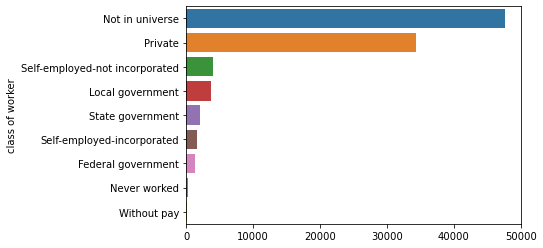

industry code


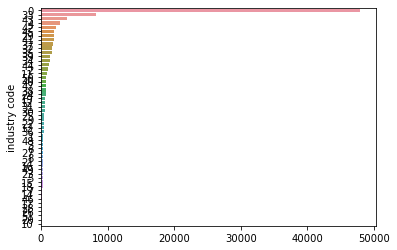

occupation code


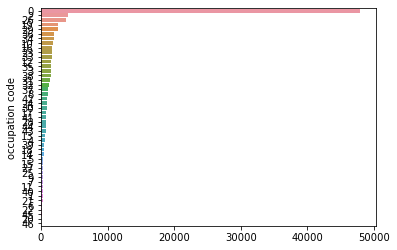

education


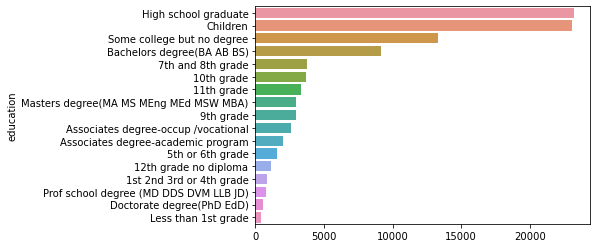

enrolled in edu inst last wk


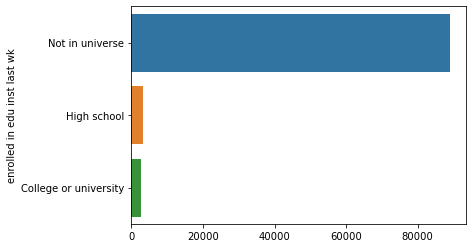

marital status


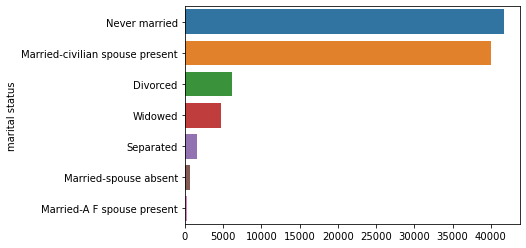

major industry code


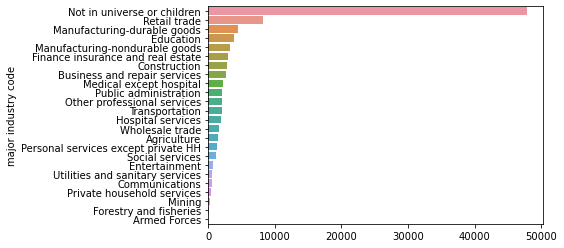

major occupation code


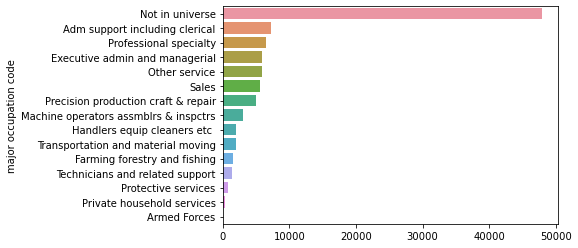

race


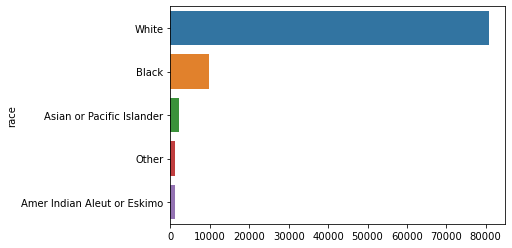

hispanic Origin


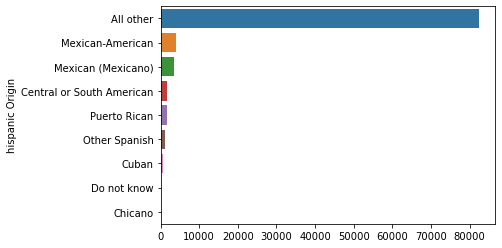

sex


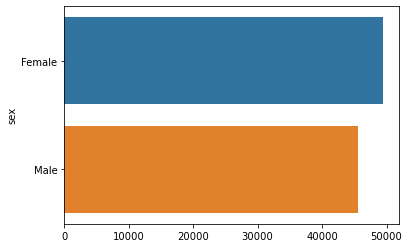

member of a labor union


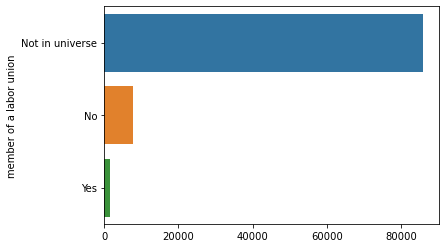

reason for unemployment


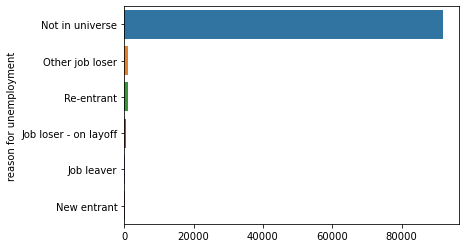

full or part time employment stat


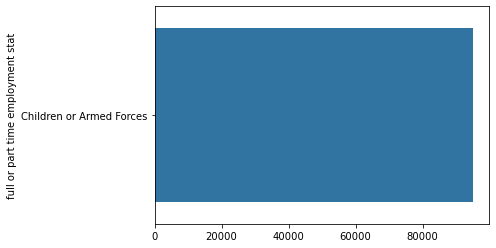

tax filer status


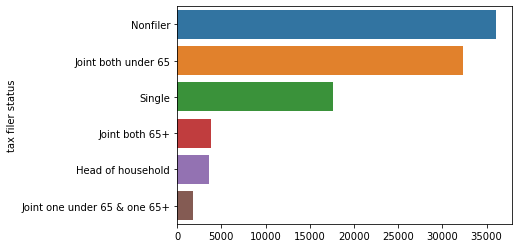

region of previous residence


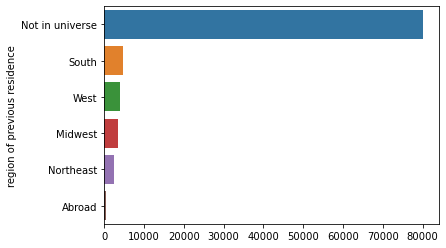

state of previous residence


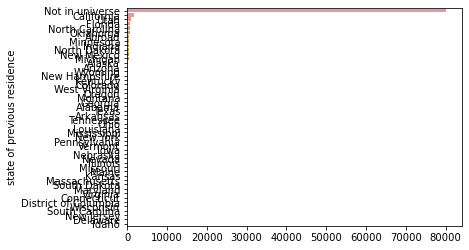

detailed household and family stat


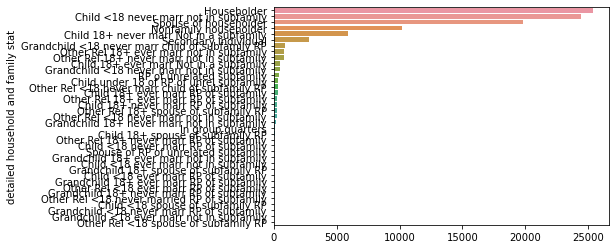

detailed household summary in household


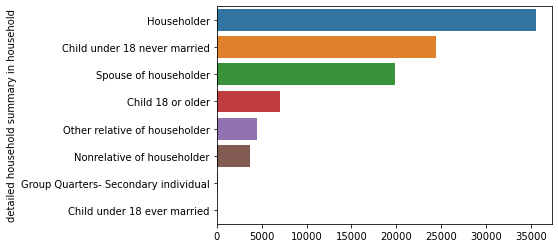

migration code-change in msa


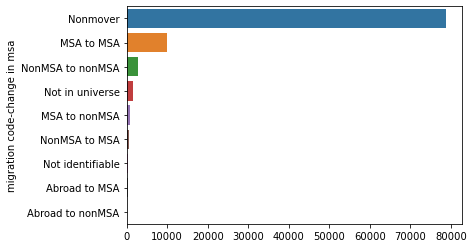

migration code-change in reg


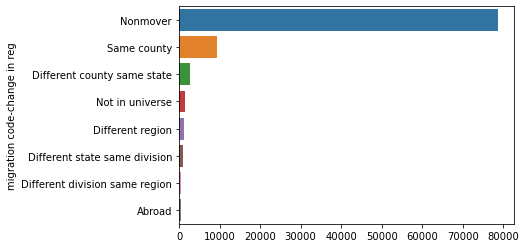

migration code-move within reg


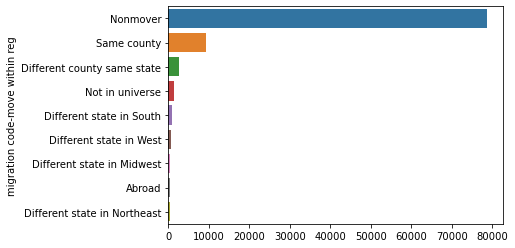

live in this house 1 year ago


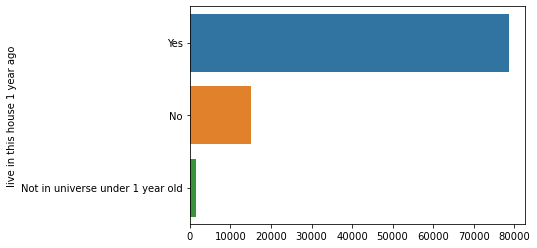

migration prev res in sunbelt


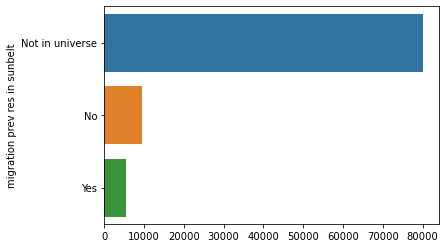

family members under 18


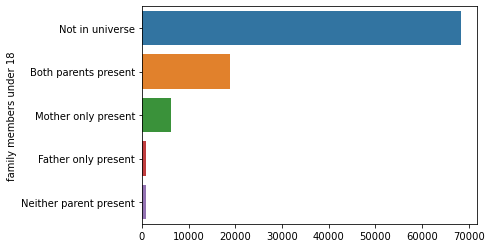

country of birth father


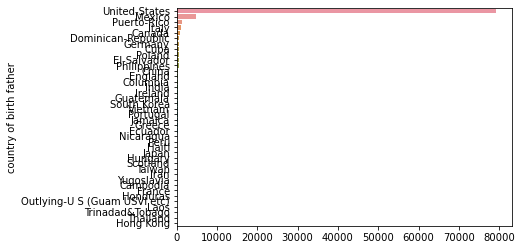

country of birth mother


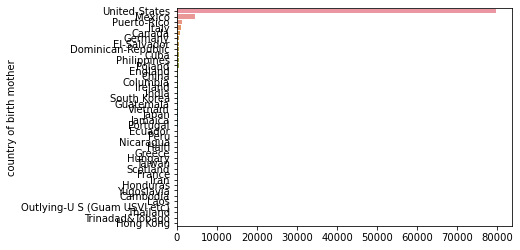

country of birth self


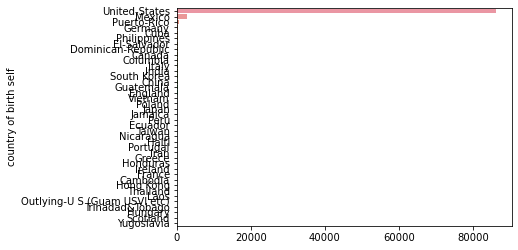

citizenship


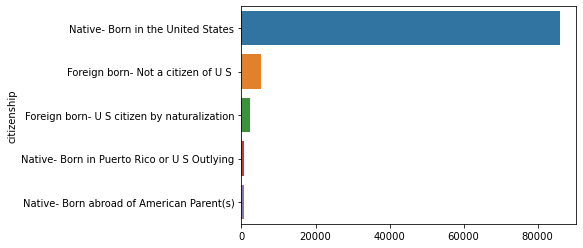

fill inc questionnaire for veteran admin


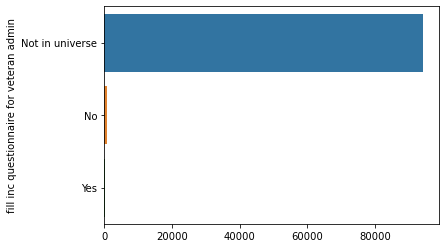

In [25]:
# box plot of categorical values
for i in cat_ft:
    print(i)
    f = updated_df1[i].value_counts()
    sns.barplot(x = f.values, y = f.index, orient='h', order= f.index)
    plt.ylabel(i)
    plt.show()

### Q3 Outlier Identification (25 pts)

#### Q3.1 For each continuous feature, identify the outliers using the IQR method. (15 pts)
For each feature, report the lower and upper bounds and number of instances that are identified as outliers.
Then, display boxplots and discuss if your outliers analysis makes sense. Discuss why you would (or would not) use the IQR method.


AAGE : age
	1st Quartile value:15.0
	3rd Quartile value:50.0
	upper_limit:102.5
	lower_limit:-37.5


0

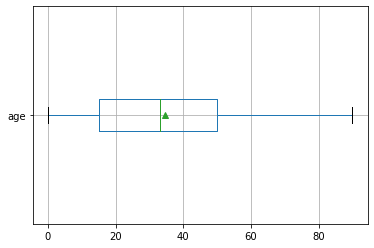

In [26]:
# check the quartiles and outliers for AAGE (age)
# AAGE age has zero outliers
df.boxplot(column=['age'], vert=False, showmeans=True)

print('AAGE : age')
Q1 = df['age'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['age'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_age = df.loc[((df['age'] < (Q1 - 1.5*IQR)) | (df['age'] > (Q3+ 1.5*IQR)))]
df_outliers_age['age'].count()

AHRSPAY: wage per hour
	1st Quartile value:0.0
	3rd Quartile value:0.0
	upper_limit:0.0
	lower_limit:0.0


11304

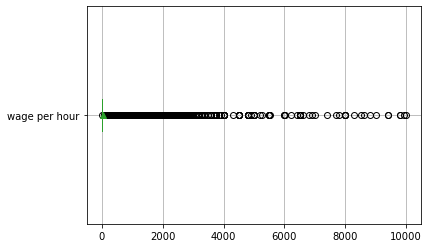

In [27]:
# check the quartiles and outliers for AHRSPAY (wage per hour)
# wage per hour has 11304 outliers which equals 5.7% of the data
# thus clamping using IQR is a good option in this case
df.boxplot(column=['wage per hour'], vert=False, showmeans=True)

print('AHRSPAY: wage per hour')
Q1 = df['wage per hour'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['wage per hour'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_wage = df.loc[((df['wage per hour'] < (Q1 - 1.5*IQR)) | (df['wage per hour'] > (Q3+ 1.5*IQR)))]
df_outliers_wage['wage per hour'].count()

CAPGAIN : capital gains
	1st Quartile value:0.0
	3rd Quartile value:0.0
	upper_limit:0.0
	lower_limit:0.0


7379

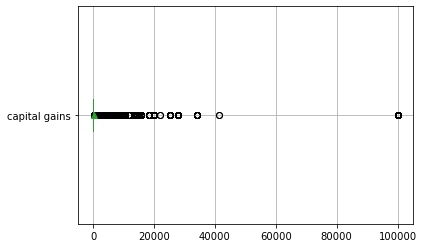

In [28]:
# check the quartiles and outliers for CAPGAIN (capital gains)
# CAPGAIN (capital gains) has 7379 outliers which equals 3.7% of the data
# thus clamping using IQR is a good option in this case
df.boxplot(column=['capital gains'], vert=False, showmeans=True)

print('CAPGAIN : capital gains')
Q1 = df['capital gains'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['capital gains'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_cg = df.loc[((df['capital gains'] < (Q1 - 1.5*IQR)) | (df['capital gains'] > (Q3+ 1.5*IQR)))]
df_outliers_cg['capital gains'].count()

CAPLOSS : capital losses
	1st Quartile value:0.0
	3rd Quartile value:0.0
	upper_limit:0.0
	lower_limit:0.0


3906

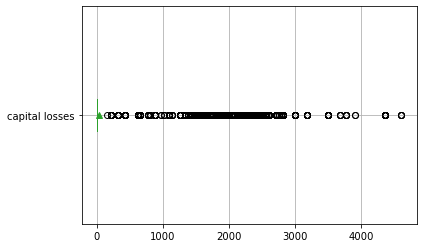

In [29]:
# check the quartiles and outliers for CAPLOSS (capital losses)
# CAPLOSS (capital losses) has 3906 outliers which equals 2% of the data
# thus clamping using IQR is a good option in this case 
df.boxplot(column=['capital losses'], vert=False, showmeans=True)

print('CAPLOSS : capital losses')
Q1 = df['capital losses'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['capital losses'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_closs = df.loc[((df['capital losses'] < (Q1 - 1.5*IQR)) | (df['capital losses'] > (Q3+ 1.5*IQR)))]
df_outliers_closs['capital losses'].count()

DIVVAL: dividends from stocks
	1st Quartile value:0.0
	3rd Quartile value:0.0
	upper_limit:0.0
	lower_limit:0.0


21141

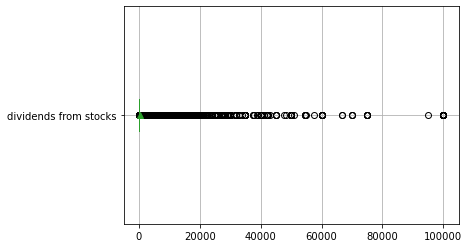

In [30]:
# check the quartiles and outliers for DIVVAL (dividends from stocks)
# DIVVAL (dividends from stocks)  
df.boxplot(column=['dividends from stocks'], vert=False, showmeans=True)

print('DIVVAL: dividends from stocks')
Q1 = df['dividends from stocks'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['dividends from stocks'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_div = df.loc[((df['dividends from stocks'] < (Q1 - 1.5*IQR)) | (df['dividends from stocks'] > (Q3+ 1.5*IQR)))]
df_outliers_div['dividends from stocks'].count()

MARSUPWT : instance weight
	1st Quartile value:1061.615
	3rd Quartile value:2188.61
	upper_limit:3879.1025000000004
	lower_limit:-628.8775000000003


6238

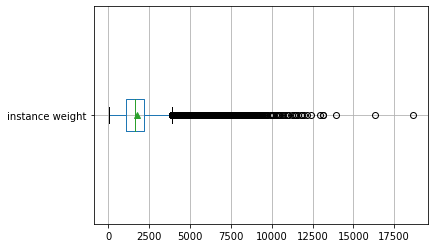

In [31]:
# check the quartiles and outliers for MARSUPWT (instance weight)
# MARSUPWT (instance weight) has 6238 outliers which equals 3.12% of the data
# thus clamping using IQR is a good option in this case
df.boxplot(column=['instance weight'], vert=False, showmeans=True)

print('MARSUPWT : instance weight')
Q1 = df['instance weight'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['instance weight'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_weight = df.loc[((df['instance weight'] < (Q1 - 1.5*IQR)) | (df['instance weight'] > (Q3+ 1.5*IQR)))]
df_outliers_weight['instance weight'].count()

NOEMP: num persons worked for employer
	1st Quartile value:0.0
	3rd Quartile value:4.0
	upper_limit:10.0
	lower_limit:-6.0


0

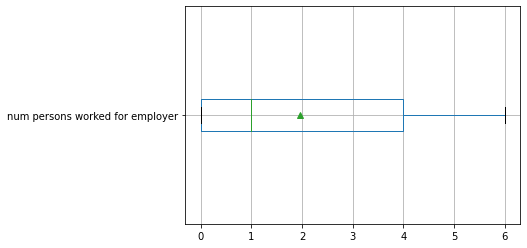

In [32]:
# check the quartiles and outliers for NOEMP (num persons worked for employer)
# NOEMP (weeks worked in year) has zero outliers
df.boxplot(column=['num persons worked for employer'], vert=False, showmeans=True)

print('NOEMP: num persons worked for employer')
Q1 = df['num persons worked for employer'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['num persons worked for employer'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_persons = df.loc[((df['num persons worked for employer'] < (Q1 - 1.5*IQR)) | (df['num persons worked for employer'] > (Q3+ 1.5*IQR)))]
df_outliers_persons['num persons worked for employer'].count()

WKSWORK: weeks worked in year
	1st Quartile value:0.0
	3rd Quartile value:52.0
	upper_limit:130.0
	lower_limit:-78.0


0

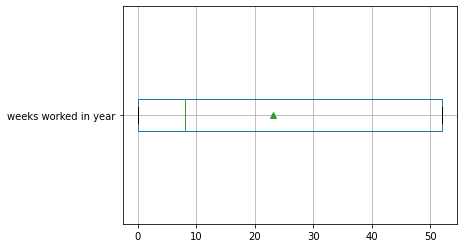

In [33]:
# check the quartiles and outliers for WKSWORK (weeks worked in year)
# WKSWORK (weeks worked in year) has zero outliers
df.boxplot(column=['weeks worked in year'], vert=False, showmeans=True)

print('WKSWORK: weeks worked in year')
Q1 = df['weeks worked in year'].quantile(0.25)
print('\t1st Quartile value:{}'.format(Q1)) # First quartile
Q3 = df['weeks worked in year'].quantile(0.75)
print('\t3rd Quartile value:{}'.format(Q3)) # Third quartile

IQR = Q3- Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('\tupper_limit:{}'. format(upper_limit))
print ('\tlower_limit:{}'. format(lower_limit))


df_outliers_wks = df.loc[((df['weeks worked in year'] < (Q1 - 1.5*IQR)) | (df['weeks worked in year'] > (Q3+ 1.5*IQR)))]
df_outliers_wks['weeks worked in year'].count()

#### Q3.2. Replace the outlying values in WKSWORK, MARSUPWT and AAGE features. (10 pts)
Use clamping with upper and lower bounds you found in the previous step. Report how many individual cells are being updated for each feature.


In [34]:
# MARSUPWT (instance weight) is the only data feature out the given three that has outliers
# 6238 is the number of cells updated in this feature
Q1 = df['instance weight'].quantile (0.25)
Q3 = df['instance weight'].quantile (0.75)
IQR = Q3 - Q1

df_outliers= df.loc[((df['instance weight'] < (Q1 - 1.5*IQR)) | (df['instance weight'] > (Q3+ 1.5*IQR)))]
out = df_outliers['instance weight'].to_list()

df_cleaned = df.copy()
df_cleaned.loc[df_cleaned['instance weight'] <= Q1, 'instance weight']  = Q1
df_cleaned.loc[df_cleaned['instance weight'] >= Q3, 'instance weight']  = Q3

df_cleaned

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran admin,veterans benefits,weeks worked in year,year,total person income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


### Q4 Normalization (10 pts)

Normalize the MARSUPWT, AAGE, NOEMP, CAPGAIN, and CAPLOSS features
* Use range normalization for MARSUPWT feature
* Use robust scaling for NOEMP feature
* Use Z-score normalization for AAGE feature
* Use log scaling for CAPGAIN and CAPLOSS features (impute your zero values with 10 before transformation to avoid undefined  $log_{b}0$)

In [35]:
# range normalization for MARSUPWT ('instance weight') feature
from sklearn import preprocessing

column = 'instance weight'
min_max_scaler = preprocessing.MinMaxScaler()
updated_df1[column] = min_max_scaler.fit_transform(np.array(updated_df1[column]).reshape(-1,1))


# view normalized data  
display(updated_df1[column])

1         0.052342
3         0.090275
4         0.053183
6         0.078308
9         0.057362
            ...   
199509    0.136984
199510    0.144468
199514    0.065736
199516    0.142797
199519    0.032619
Name: instance weight, Length: 95135, dtype: float64

In [36]:
# Z-score normalization for AAGE ('age') feature
column = 'age'
zs_scaler = preprocessing.StandardScaler()
zs_scaled = zs_scaler.fit_transform(np.array(updated_df1[column]).reshape(-1,1))
  
# view normalized data  
display(updated_df1[column])

1         58
3          9
4         10
6         42
9         34
          ..
199509    47
199510    25
199514    51
199516     3
199519    65
Name: age, Length: 95135, dtype: int64

In [37]:
# robust scaling for NOEMP ('num persons worked for employer') feature
column = 'num persons worked for employer'
robust_scaler = preprocessing.RobustScaler()
robust_scaled = robust_scaler.fit(np.array(updated_df1[column]).reshape(-1,1))

# view normalized data  
display(updated_df1[column])

1         1
3         0
4         0
6         6
9         6
         ..
199509    6
199510    4
199514    6
199516    0
199519    1
Name: num persons worked for employer, Length: 95135, dtype: int64

In [38]:
# log scaling for CAPGAIN and CAPLOSS features 
updated_df = updated_df1.mask(updated_df1['capital gains'] == 0,10)

updated_df = updated_df1.mask(updated_df1['capital losses'] == 0,10)
updated_df['capital gains'] = np.log2(updated_df['capital gains'])
updated_df['capital losses'] = np.log2(updated_df['capital losses'])

updated_df[['capital gains','capital losses']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,capital gains,capital losses
1,3.321928,3.321928
3,3.321928,3.321928
4,3.321928,3.321928
6,3.321928,3.321928
9,3.321928,3.321928
...,...,...
199509,3.321928,3.321928
199510,3.321928,3.321928
199514,3.321928,3.321928
199516,3.321928,3.321928
